In [1]:
#importing liberaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from kmodes.kmodes import KModes
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
data=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df=data.copy()
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. This is a fictional data set created by IBM data scientists.**

**Education**

1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

**Environment Satisfaction**

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**Job Involvement**

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**Job Satisfaction**

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**Performance Rating**

1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

**Relationship Satisfaction**

1 'Low'
2 'Medium'
3 'High'
4 'Very High'

**WorkLife Balance**

1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Define a function to visulize the features with missing values, and % of total values, & datatype
def missing_values_table(df):
     # Total missing values
    mis_val = df.isnull().sum()
    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_type = df.dtypes
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis=1)
        
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values', 2: 'type'})
        
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[ mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
        
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_ren_columns.shape[0]) + " columns that have missing values.")
        
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [5]:
missing_values_table(df)

Your selected dataframe has 35 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,type


## Data Visualization

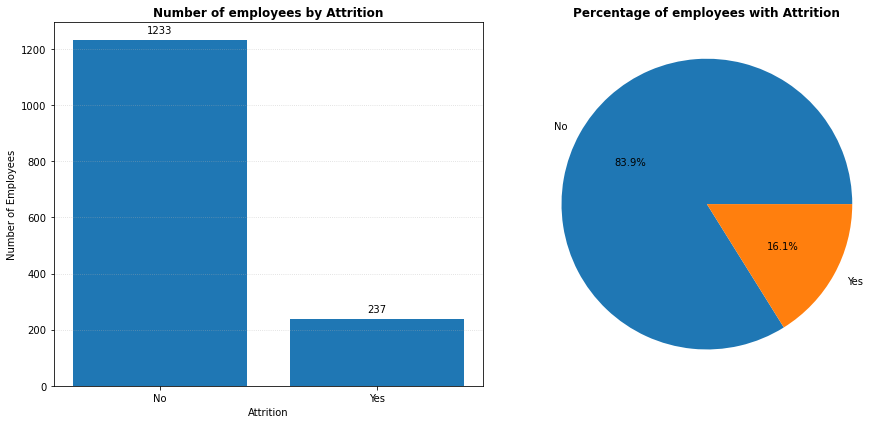

In [6]:
Target_counts = df['Attrition'].value_counts().sort_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
# First the bar plot
ax1.bar(Target_counts.index, Target_counts)
ax1.set_xticks(Target_counts.index) # see what happens without this
ax1.set_title('Number of employees by Attrition',fontweight='bold')
ax1.set_xlabel('Attrition')
ax1.set_ylabel('Number of Employees')
ax1.grid(axis='y', alpha=0.5, ls=':');

def add_value_labels(ax1, spacing=5):
    # For each bar: Place a label
    for rect in ax1.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax1.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax1)
# Pie chart on the right
ax2.pie(Target_counts, labels=Target_counts.index, autopct='%.1f%%') # Try replacing %f with %f%%, then %.f%%, then %.1f%%
ax2.set_title('Percentage of employees with Attrition',fontweight='bold');
fig.tight_layout()

In [7]:
di = {1: "Dis-Satisfied", 2: "Dis-Satisfied", 3: "Satisfied", 4: "Satisfied"}
df.replace({"JobSatisfaction": di}, inplace=True)

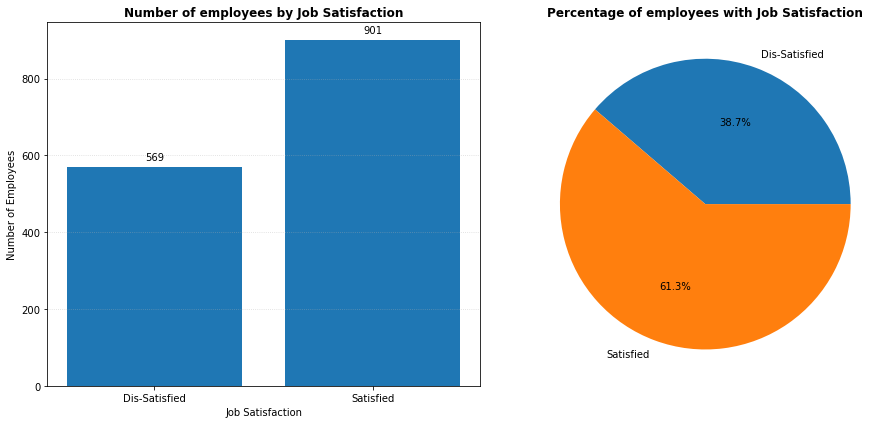

In [8]:
Target_counts = df['JobSatisfaction'].value_counts().sort_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 6))
# First the bar plot
ax1.bar(Target_counts.index, Target_counts)
ax1.set_xticks(Target_counts.index) # see what happens without this
ax1.set_title('Number of employees by Job Satisfaction',fontweight='bold')
ax1.set_xlabel('Job Satisfaction')
ax1.set_ylabel('Number of Employees')
ax1.grid(axis='y', alpha=0.5, ls=':');

def add_value_labels(ax1, spacing=5):
    # For each bar: Place a label
    for rect in ax1.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax1.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax1)
# Pie chart on the right
ax2.pie(Target_counts, labels=Target_counts.index, autopct='%.1f%%') # Try replacing %f with %f%%, then %.f%%, then %.1f%%
ax2.set_title('Percentage of employees with Job Satisfaction',fontweight='bold');
fig.tight_layout()

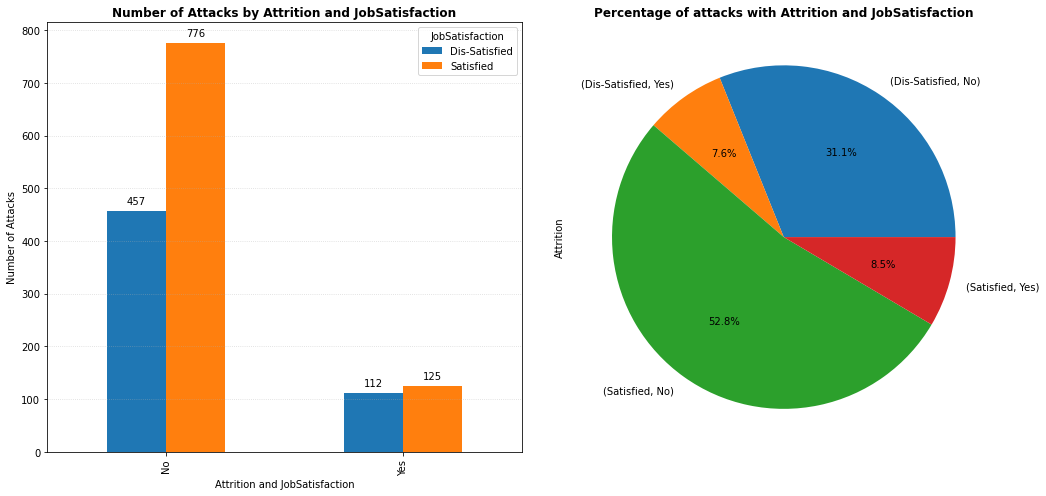

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
df.groupby('Attrition')['JobSatisfaction'].value_counts().unstack().plot.bar(ax=ax1)
ax1.set_title('Number of Attacks by Attrition and JobSatisfaction',fontweight='bold')
ax1.set_xlabel('Attrition and JobSatisfaction')
ax1.set_ylabel('Number of Attacks')
ax1.grid(axis='y', alpha=0.5, ls=':');

def add_value_labels(ax1, spacing=5):
    # For each bar: Place a label
    for rect in ax1.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'
        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
        # Use Y value as label and format number with one decimal place
        label = "{:.0f}".format(y_value)

        # Create annotation
        ax1.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.


# Call the function above. All the magic happens there.
add_value_labels(ax1)
df.groupby('JobSatisfaction')['Attrition'].value_counts().plot.pie(ax=ax2,autopct='%.1f%%')
ax2.set_title('Percentage of attacks with Attrition and JobSatisfaction',fontweight='bold');
fig.tight_layout()



61% of employees are satisfied and 39% employees are unsatisfed.

In [10]:
#Listing Numerical Variables
numerical = list(df.select_dtypes(include=['float', 'int64']).columns)

In [11]:
from scipy.stats import ks_2samp
def run_KS_test(feature):
    dist1 = df.loc[df['Attrition'] == "Yes",feature]
    dist2 = df.loc[df['Attrition'] == "No",feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')
    
for a in numerical:
    run_KS_test(a)

Age:
KstestResult(statistic=0.24376071534899957, pvalue=7.134659529839382e-11) 

DailyRate:
KstestResult(statistic=0.09050684242405577, pvalue=0.07179820225323919) 

DistanceFromHome:
KstestResult(statistic=0.11493013849107353, pvalue=0.009527282524933955) 

Education:
KstestResult(statistic=0.04480170829611835, pvalue=0.8002337546797373) 

EmployeeCount:
KstestResult(statistic=0.0, pvalue=1.0) 

EmployeeNumber:
KstestResult(statistic=0.0500066730317123, pvalue=0.6809540490730315) 

EnvironmentSatisfaction:
KstestResult(statistic=0.13185910663504677, pvalue=0.0017724357994765016) 

HourlyRate:
KstestResult(statistic=0.0527066843245352, pvalue=0.6165733735381614) 

JobInvolvement:
KstestResult(statistic=0.12656174607574405, pvalue=0.003075928684525442) 

JobLevel:
KstestResult(statistic=0.2789635241820403, pvalue=3.907985046680551e-14) 

MonthlyIncome:
KstestResult(statistic=0.26190109540382106, pvalue=1.673106098110111e-12) 

MonthlyRate:
KstestResult(statistic=0.041886106747974994, pv

In [12]:
from scipy.stats import ks_2samp
def run_KS_test(feature):
    dist1 = df.loc[df['JobSatisfaction'] == "Dis-Satisfied",feature]
    dist2 = df.loc[df['JobSatisfaction'] == "Satisfied",feature]
    print(feature+':')
    print(ks_2samp(dist1,dist2),'\n')
    
for a in numerical:
    run_KS_test(a)

Age:
KstestResult(statistic=0.014184590837362898, pvalue=0.9999991851744012) 

DailyRate:
KstestResult(statistic=0.08419662589312012, pvalue=0.013253748144147481) 

DistanceFromHome:
KstestResult(statistic=0.02643616056363853, pvalue=0.9607779857997498) 

Education:
KstestResult(statistic=0.03909735131244526, pvalue=0.6416641104189185) 

EmployeeCount:
KstestResult(statistic=0.0, pvalue=1.0) 

EmployeeNumber:
KstestResult(statistic=0.06145485683745262, pvalue=0.13626680126232926) 

EnvironmentSatisfaction:
KstestResult(statistic=0.02847061164220969, pvalue=0.929822239130243) 

HourlyRate:
KstestResult(statistic=0.07302372485950974, pvalue=0.045538892375594275) 

JobInvolvement:
KstestResult(statistic=0.023303535029424442, pvalue=0.9885351452775684) 

JobLevel:
KstestResult(statistic=0.0111241366261662, pvalue=0.9999999999321966) 

MonthlyIncome:
KstestResult(statistic=0.031925082265555356, pvalue=0.8545916775015745) 

MonthlyRate:
KstestResult(statistic=0.029752140269842724, pvalue=0.9

In [13]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the Diabetes status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=True, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
        ax1.set_xlabel(full_name)
        ax1.set_ylabel('Count')
        ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by Diabetes or not
    if continuous:
        sns.boxplot(x=col_name, y='JobSatisfaction', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Job Satisfaction')
    else:
        Diabetes_rates = df.groupby(col_name)['JobSatisfaction'].value_counts(normalize=True)[:].plot(kind='bar')
        #sns.barplot(Diabetes_rates, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction JobSatisfaction')
        ax2.set_title('JobSatisfaction by ' + full_name)
        ax2.set_xlabel(full_name)
    
   # plot3: kde plot of the variable gropued by Diabetes_status
    if continuous:
        facet = sns.FacetGrid(df, hue = 'JobSatisfaction', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='JobSatisfaction', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

for plot_element in numerical: 
    plot_var(plot_element, plot_element, continuous=True)

In [14]:
#Listing Numerical Variables
catagorical = list(df.select_dtypes(include=['object']).columns)

for plot_element in catagorical: 
    plot_var(plot_element, plot_element, continuous=False)

In [15]:
# make general plots to examine each feature
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with/without faceting on the Diabetes status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True for continuous variables
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, figsize=(15,3))
    # plot1: counts distribution of the variable
    
    if continuous:  
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=True, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

          
    # plot2: bar plot of the variable grouped by Diabetes or not
    if continuous:
        sns.boxplot(x=col_name, y='Attrition', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Attrition')
    else:
        Diabetes_rates = df.groupby(col_name)['Attrition'].value_counts(normalize=True)[:].plot(kind='bar')
        #sns.barplot(Diabetes_rates, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction Attrition')
        ax2.set_title('Attrition by ' + full_name)
        ax2.set_xlabel(full_name)
    
    
   # plot3: kde plot of the variable gropued by Diabetes_status
    if continuous:
        facet = sns.FacetGrid(df, hue = 'Attrition', size=3, aspect=4)
        facet.map(sns.kdeplot, col_name, shade=True)
        facet.set(xlim=(df[col_name].min(), df[col_name].max()))
        facet.add_legend()  
    else:
        fig = plt.figure(figsize=(12,3))
        sns.countplot(x=col_name, hue='Attrition', data=df, order=sorted(df[col_name].unique()) )
     
    plt.tight_layout()

for plot_element in numerical: 
    plot_var(plot_element, plot_element, continuous=True)

for plot_element in catagorical: 
    plot_var(plot_element, plot_element, continuous=False)

In [16]:
cols = ['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

df = pd.get_dummies(df, columns=cols, drop_first=True)

In [17]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['JobSatisfaction'] = df['JobSatisfaction'].map({"Satisfied": 1, "Dis-Satisfied": 0})

In [18]:
df = pd.get_dummies(df,drop_first=True)
df = df.apply(pd.to_numeric, errors='ignore')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

df=df.apply(pd.to_numeric)

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve, precision_score, accuracy_score
from sklearn.metrics import recall_score, classification_report, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [21]:
keep= list(df.select_dtypes(include=['float', 'int64']).columns)

In [22]:
df=df[keep]

In [23]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

In [24]:
df = pd.get_dummies(df,drop_first=True)
df = df.apply(pd.to_numeric, errors='ignore')

In [25]:
df.columns

Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EmployeeCount             1470 non-null   int64
 6   EmployeeNumber            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   HourlyRate                1470 non-null   int64
 9   JobInvolvement            1470 non-null   int64
 10  JobLevel                  1470 non-null   int64
 11  JobSatisfaction           1470 non-null   int64
 12  MonthlyIncome             1470 non-null   int64
 13  MonthlyRate               1470 non-null   int64
 14  NumCompaniesWorked        1470 non-null 

In [27]:
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,1,1,2,94,3,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,8,1,1,2,3,61,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,2,2,1,4,4,92,2,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,3,4,1,5,4,56,3,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,2,1,1,7,1,40,3,...,4,80,1,6,3,3,2,2,2,2


df=df.drop('Travel_Rarely', axis=1)
df.head()

### Train Test Split

In [28]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3,random_state=0)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(1029, 26) (1029,)
(441, 26) (441,)


In [29]:
cols = ['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

scaler = StandardScaler()
for col in cols:
    xtrain[col] = scaler.fit_transform(xtrain[col].values.reshape(-1 ,1))
    xtest[col] = scaler.fit_transform(xtest[col].values.reshape(-1 ,1))

<ipython-input-29-58e7280f5c6d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtrain[col] = scaler.fit_transform(xtrain[col].values.reshape(-1 ,1))
<ipython-input-29-58e7280f5c6d>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xtest[col] = scaler.fit_transform(xtest[col].values.reshape(-1 ,1))
<ipython-input-29-58e7280f5c6d>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

# 1. Logistic Regression

### Creating Model & Training

In [30]:
clf_lr = LogisticRegression()

In [31]:
clf_lr.fit(xtrain, ytrain)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Evaluation

Predicting binary classifier

In [32]:
lr_pred = clf_lr.predict(xtest)

Predicting prabability of **0** and **1**

In [33]:
lr_pred_prb = clf_lr.predict_proba(xtest)

In [34]:
lr_pred_prb[0:5,0:5]

array([[0.77256437, 0.22743563],
       [0.6930402 , 0.3069598 ],
       [0.83662168, 0.16337832],
       [0.79846511, 0.20153489],
       [0.51203297, 0.48796703]])

First value in Numpy array is probability of **0** and second is probability of **1**

Only predicting and extracting probability values of **1**

In [35]:
lr_pred_prb = clf_lr.predict_proba(xtest)[:,1]

### Comparison of Predicted and Actual

In [36]:
xtest.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
442,-0.133138,-0.397860,0.076341,1.057938,1,-0.728316,-0.621917,-1.774505,0.361868,0.83104,...,1.143324,80,-0.907096,-0.199855,0.105953,-1.155965,0.477731,-0.368844,2.096667,0.775669
1091,-0.455152,-0.549525,1.906028,0.128554,1,0.855697,1.218790,-1.173578,-1.025817,-0.07611,...,1.143324,80,-0.907096,-0.831204,-0.612897,0.338993,-0.340759,-0.368844,-0.675376,-0.610352
981,-0.240476,-0.329611,1.052174,1.057938,1,0.581445,1.218790,-0.021802,0.361868,-0.07611,...,0.197347,80,0.259170,-0.831204,-2.050596,-1.155965,-0.504457,-0.647371,0.248639,-0.610352
785,0.296214,1.768423,1.296132,1.057938,1,0.102751,-1.542270,-0.322266,0.361868,0.83104,...,1.143324,80,0.259170,0.305223,2.262502,0.338993,0.641429,1.580849,2.712677,-0.887556
1332,-0.884503,-0.842744,1.784049,-0.800829,1,1.392566,1.218790,0.278661,-1.025817,-0.98326,...,-0.748631,80,-0.907096,-1.336283,0.105953,-1.155965,-0.995551,-1.204426,-0.367371,-1.164760


In [37]:
xt = xtest.copy()
xt['pred'] = lr_pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,pred,pred_probability,actual
442,-0.133138,-0.397860,0.076341,1.057938,1,-0.728316,-0.621917,-1.774505,0.361868,0.83104,...,-0.199855,0.105953,-1.155965,0.477731,-0.368844,2.096667,0.775669,0,0.227436,0
1091,-0.455152,-0.549525,1.906028,0.128554,1,0.855697,1.218790,-1.173578,-1.025817,-0.07611,...,-0.831204,-0.612897,0.338993,-0.340759,-0.368844,-0.675376,-0.610352,0,0.306960,0
981,-0.240476,-0.329611,1.052174,1.057938,1,0.581445,1.218790,-0.021802,0.361868,-0.07611,...,-0.831204,-2.050596,-1.155965,-0.504457,-0.647371,0.248639,-0.610352,0,0.163378,1
785,0.296214,1.768423,1.296132,1.057938,1,0.102751,-1.542270,-0.322266,0.361868,0.83104,...,0.305223,2.262502,0.338993,0.641429,1.580849,2.712677,-0.887556,0,0.201535,0
1332,-0.884503,-0.842744,1.784049,-0.800829,1,1.392566,1.218790,0.278661,-1.025817,-0.98326,...,-1.336283,0.105953,-1.155965,-0.995551,-1.204426,-0.367371,-1.164760,0,0.487967,1


### Confusion Matrix

xt["actual"] = xt["actual"].fillna(0)

In [38]:
xt["actual"].value_counts()

0    371
1     70
Name: actual, dtype: int64

In [39]:
tn, fp, fn, tp = confusion_matrix(xt['actual'], xt['pred']).ravel()
conf_matrix=pd.DataFrame({"pred_Survived":[tp,fp],"pred_Not Survived":[fn,tn]},index=["Survived","Not Survived"])
conf_matrix

,pred_Survived,pred_Not Survived
Survived,10,60
Not Survived,7,364


In [40]:
### Accuracy

In [41]:
accuracy = (tp + tn) / (tp + fp + tn + fn)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8480725623582767


### Precision

In [42]:
precision_1 = tp / (tp + fp)
print("Precision for 1: {}".format(precision_1))
precision_0 = tn / (tn + fn)
print("Precision for 0: {}".format(precision_0))

Precision for 1: 0.5882352941176471
Precision for 0: 0.8584905660377359


### Classification Report

In [43]:
print(classification_report(ytest,lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       371
           1       0.59      0.14      0.23        70

    accuracy                           0.85       441
   macro avg       0.72      0.56      0.57       441
weighted avg       0.82      0.85      0.81       441



In [44]:
from sklearn.feature_selection import RFE #importing RFE class from sklearn library

rfe = RFE(estimator= clf_lr , step = 1)
# estimator clf_lr is the baseline model (basic model) that we have created under "Base line Model" selection
# step = 1: removes one feature at a time and then builds a model on the remaining features
# It uses the model accuracy to identify which features (and combination of features) contribute the most to predicting the target variable.
# we can even provide no. of features as an argument

# Fit the function for ranking the features
fit = rfe.fit(xtrain, ytrain)

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 13
Selected Features: [ True False  True False False False  True False  True False False  True
 False  True False False False False  True  True False  True  True  True
  True  True]
Feature Ranking: [ 1  8  1 11 14  9  1 13  1  7  4  1 10  1  2  3  6 12  1  1  5  1  1  1
  1  1]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [45]:
selected_rfe_features = pd.DataFrame({'Feature':list(xtrain.columns),
'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
0,Age,1
23,YearsInCurrentRole,1
22,YearsAtCompany,1
21,WorkLifeBalance,1
19,TotalWorkingYears,1
18,StockOptionLevel,1
13,NumCompaniesWorked,1
24,YearsSinceLastPromotion,1
11,MonthlyIncome,1
25,YearsWithCurrManager,1
